In [1]:
import pandas as pd
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier)
from scipy.stats import randint as sp_randint
from sklearn.grid_search import RandomizedSearchCV
from sqlalchemy import create_engine
from xgboost.sklearn import XGBClassifier
import numpy as np
from matplotlib import pyplot as plt
from sklearn import cross_validation

In [2]:
pd.set_option('max_columns',400)

In [3]:
f = open('DW_CREDS.csv', 'r')

In [4]:
all_creds = f.readlines()

In [5]:
username = all_creds[1].split(',')[0].strip()
password = all_creds[1].split(',')[1].strip()
f.close()

In [8]:
db02 = create_engine('mssql+pyodbc://wvrgroup\\'+ username +':'+ password +'@dw02')

In [9]:
db02_cnxn = db02.connect()

In [8]:
%matplotlib inline 

In [10]:
# for i in list(df_Users.columns):
#     try:
#         print i
#         fd = open('stats_users.csv','a')
#         fd.write(i+'\n')
#         fd.close()
#         df_trial_queries = pd.read_sql_query("SELECT {} FROM HA_User.dbo.Users".format(i), db02_cnxn)
#         df_value_cnt = pd.value_counts(df_trial_queries[i], dropna=False)[1:40]
#         df_value_cnt.to_csv('stats_users.csv',encoding='utf-8' ,mode='a')
#     except:
#         pass

In [11]:
# df_UserPublicProfile = pd.read_sql_query("SELECT top(5) * FROM HA_User.dbo.UserPublicProfile;",db02_cnxn)

In [12]:
# df_UserPublicProfile.head()

In [13]:
# query = db02_cnxn.execute("SELECT top(5) * FROM HA_User.dbo.Users;")
# query.first()

In [9]:
df_Users = pd.read_sql_query('''SELECT * FROM DW.dbo.Users u
INNER JOIN DW.dbo.Email e ON e.EmailId = u.EmailId 
LEFT OUTER JOIN HA_User.dbo.UserPublicProfile upp  ON  upp.UserId = u.UserId 
LEFT OUTER JOIN HA_User.dbo.PublicProfilePicture ppp ON upp.CurrentPublicProfilePictureId = ppp.PublicProfilePictureId where u.FirstName like '%deepsagar%';''',db02_cnxn)

In [55]:
df_Users1 = pd.read_sql_query('''SELECT * FROM DW.dbo.QuoteFact qf 
JOIN DW.dbo.Quote q  ON q.QuoteId = qf.QuoteId
JOIN DW.dbo.Customer c ON qf.CustomerId = c.CustomerId
JOIN DW.dbo.Vw_Email e ON qf.TravelerId = e.EmailId
JOIN DW.dbo.Brand b ON q.BrandId = b.BrandId
JOIN DW.dbo.Users u ON e.EmailId = u.EmailId 
JOIN DW.dbo.Reservation r ON r.reservationId = qf.reservationId
JOIN Dw.dbo.ReservationStatusType rst ON r.reservationstatusTypeId = rst.reservationStatusTypeId
JOIN DW.dbo.ListingAttributes la ON la.ListingAttributesId = qf.ListingAttributesId
JOIN HA_User.dbo.UserPublicProfile upp  ON  upp.UserId = u.UserId AND upp.ActiveFlag = 1
JOIN HA_User.dbo.PublicProfilePicture ppp ON upp.CurrentPublicProfilePictureId = ppp.PublicProfilePictureId where u.UserName = 'deepsagar_lambor@yahoo.co.in';''',db02_cnxn)

In [10]:
df_Users

,UserId,SourceUserId,UserGuid,LastLoginDate,LastFailedLoginDate,FailedLoginAttempts,FraudFlag,ActiveFlag,RegisteredFlag,BlockedFlag,BlockedDate,SecurityFailure,ScreenName,FirstName,MiddleName,LastName,LanCode,TimeZoneCode,Comment,CreateDate,UpdateDate,SourcePrimaryPhoneNumberId,PhoneNumber,SourceUserStatusId,UserStatus,Title,MaidenName,Suffix,CompanyName,PropertyMgrHAFlag,PropertyMgrMemberFlag,CreatedIPAddress,ScreenLocation,EmailSha1Hash,EmailMd5Hash,ActiveDirectoryFlag,MergeToUserGUID,SourceUserTypeId,UserType,EmailId,UserName,PublicUUID,Failed2FACodeAttempts,Failed2FACodeReceives,Generated2FACodes,IdentityUserGUID,IdentityEmailId,IdentityPublicUUID,SystemCodeTypeId,HomeAwayTransactionVersion,DWCreateDate,DWLastUpdateDate,EmailId,EmailAddress,DWCreateDate,DWUpdateDate,DeliverableFlag,BlacklistFlag,BlacklistSourceID,LastBounceFlag,InquirySpamFlag,InvalidFormatFlag,FirstInquiryDate,EmailUUID,GlobalSubscribed,GlobalUnsubDate,EmailAddressPunycode,PublicUUID,FirstName,LastName,CompanyName,UserGUID,TravelerFlag,OwnerFlag,ActiveDirectoryFlag,LastLoginDate,CreatedByProcessName,UserId,ProfileUuid,About,Employer,Languages,School,SourceFacebookUserId,AdditionalFieldsJson,CreateDate,UpdateDate,Gender,Hometown,ActiveFlag,Complete,CompleteDate,CurrentPublicProfilePictureId,UserPublicProfileId,PublicProfilePictureId,PublicProfilePictureUuid,ProfileUuid,Source,MediaCollectionItemUuid,MediaCollectionUuid,Variant,Default,CreateDate,CreateBy,UpdateDate,UpdateBy
0,51386683,52150625,14064275399D4BAEABB0D50B0CE626A7,None,NaT,0,False,True,False,False,None,0,Deepsagar Lambor,Deepsagar,[Unknown],Lambor,00,[Unknown],[Unknown],2016-08-11 10:28:30.763,2016-08-11 10:28:30.803,0,[Unknown],1,GOOD_STANDING,[Unknown],[Unknown],[Unknown],[Unknown],False,False,[Unknown],[Unknown],dc507f3b6e08efaef0f0cd64c74ed9163144ef94,4a49fc8cfbd466783ada20e86f8dc2d2,True,[N/A],1,INDIVIDUAL,100246228,dlambor@homeaway.com,FD415F92-345A-407D-9192-E97494A3BD43,0,0,0,14064275399D4BAEABB0D50B0CE626A7,100246228,FD415F92-345A-407D-9192-E97494A3BD43,23,"[0, 0, 0, 0, 159, 42, 12, 186]",2016-08-11 21:08:31.150000,2016-08-12 04:03:11.083333,100246228,dlambor@homeaway.com,2016-08-12 04:03:11.083333,2016-08-13 06:46:16.663333,1,0,0,0,0,0,None,2C3F8C68-DB3B-0D66-A476-9A77D9DA8823,1,None,dlambor@homeaway.com,FD415F92-345A-407D-9192-E97494A3BD43,Deepsagar,Lambor,None,14064275399D4BAEABB0D50B0CE626A7,False,False,True,None,[UNKNOWN],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,52213945,52978660,9d0cde795f8a4218a8ba5099a8c7968a,None,2016-09-06 10:08:38.550,1,False,True,False,False,None,0,[Unknown],Deepsagar,[Unknown],Lambor,00,[Unknown],[Unknown],2016-09-06 09:08:40.710,2016-09-06 09:11:34.063,0,[Unknown],1,GOOD_STANDING,[Unknown],[Unknown],[Unknown],[Unknown],False,False,10.1.0.147,[Unknown],b272b788d0a77cd017f7c31373975aa5d412d681,f4e3ffe4e823ca4114585c9ab8bbd08d,False,[N/A],1,INDIVIDUAL,101056457,deepsagar.lambor@gmail.com,70AA3C74-CE73-46D5-A9C9-49AD169543B9,0,0,0,9d0cde795f8a4218a8ba5099a8c7968a,101056457,70AA3C74-CE73-46D5-A9C9-49AD169543B9,23,"[0, 0, 0, 0, 163, 118, 226, 103]",2016-09-06 21:01:27.876666,2016-09-07 03:58:14.010000,101056457,deepsagar.lambor@gmail.com,2016-09-07 00:43:02.120000,2016-09-07 05:35:22.420000,1,0,0,0,0,0,None,45FA45F9-2F42-78F9-E277-051382860CDF,-1,None,deepsagar.lambor@gmail.com,70AA3C74-CE73-46D5-A9C9-49AD169543B9,Deepsagar,Lambor,None,9d0cde795f8a4218a8ba5099a8c7968a,True,False,False,None,PR_CampaignActivity_SystemEmail_Load,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,52205434,52970145,2C680E11A95E4BC3B18D28F6D4530A63,None,NaT,0,False,True,False,False,None,0,[Unknown],DEEPSAGAR,[Unknown],LAMBOR,00,[Unknown],[Unknown],2016-09-05 22:08:13.330,2016-09-05 22:09:49.217,0,[Unknown],1,GOOD_STANDING,[Unknown],[Unknown],[Unknown],[Unknown],False,False,72.182.62.70

In [56]:
df_Users1

,QuoteItemId,QuoteId,AcceptedDate,AmountLocalCurrency,CancelledDate,CheckInDate,CheckInDateOriginal,CheckOutDate,CheckOutDateOriginal,QuoteItemCreatedDate,CurrencyCode,CurrencyConversionIdMasterBrandCurrency,CurrencyConversionIdUSD,CustomerAttributesId,CustomerId,DeclinedDate,DisplayBrandAttributesId,SiteId,DisplayRegionId,EditedDate,HomeAwayCommissionAmount,HomeAwayCommissionOriginalAmount,InquiryDate,InquiryId,ListingAttributesId,ListingDisplayAttributesId,ListingId,ListingUnitAttributesId,ListingUnitId,MasterBrandAttributesId,MasterBrandCurrency,MasterBrandId,PaidAmountLocalCurrency,PaidCurrencyCode,PaidCurrencyConversionId,ProjectedRevenueDate,QuoteItemIndex,QuoteItemStatusTypeId,QuoteStatusId,QuoteTypeId,RefundedAmountLocalCurrency,RefundedCurrencyCode,RefundedCurrencyConversionId,ReservationId,ReservationConfirmedDate,ReservationCompleteDate,ReservationCancelledDate,ReservationDeclinedByOwnerDate,ReservationDeclinedBySystemDate,ReservationCancelledByOwnerDate,ReservationCancelledByTravelerDate,ReservationCommissionTypeId,ReservationStatusTypeId,ReservationTimeToOwnerResponseHours,SubscriptionId,TaxableFlag,TaxAmountLocalCurrency,TotalCommissionAmount,TotalCommissionOriginalAmount,TravelerId,TravelerProductId,QuotedStayDurationNights,DWCreateDate,DWLastUpdateDate,CommissionBasisAmountLocalCurrency,CommissionRefundAmount,QuoteItemActiveFlag,QuoteActiveFlag,ReservationRefundedDate,DeviceCategorySessionId,SiteExperienceSessionId,WebsiteReferralMediumSessionId,DistributionId,QuoteCreatedDate,ReservationCreateDate,FirstPaymentDate,BookingDate,AssistedBookingFlag,FirstRefundDate,SubscriptionAttributesId,PaymentScheduleIndicator,VisitId,FullVisitorId,QuoteItemPaymentDate,TravelerOrderSourceCode,PaymentMethodTypeId,ReservationOriginationDate,StrategicDestinationId,StrategicDestinationAttributesId,DWCreateDate,QuoteId,QuoteGuid,ExternalRefId,ExternalRefType,ExternalObjectGuid,CurrencyCode,TaxRate,TaxAmount,CheckInDate,CheckOutDate,BodyText,ActiveFlag,CreatedDate,UpdateDate,QuoteStatus,BookingTypeId,LinkId,AppId,BrandId,ListingId,RentalUnitId,CustomerId,CurrencyConversionId,InquiryGUID,ListingUnitId,PaymentStatusType,ProjectedCommissionAmountLocalCurrency,ProjectedCommissionAmountUSD,ProjectedCommissionPercent,ProjectedRevenueDate,QuoteTotalAmountLocalCurrency,QuoteTotalAmountUSD,RegionId,ReservationGUID,ReservationCommissionTypeID,ContractAddenddum,DWLastUpdateDate,TravelerId,SiteId,CommissionBasisCheckInDate,CommissionBasisCheckOutDate,ReservationId,TotalCommissionAmountLocalCurrency,TotalCommissionAmountUSD,TotalCommissionBasisAmountLocalCurrency,TotalCommissionBasisAmountUSD,OnlineBookingIndicator,DistributionId,ProjectedRevShareAmountLocalCurrency,ProjectedRevShareAmountUSD,ProjectedRevSharePercent,HomeAwayCommissionAmountLocalCurrency,HomeAwayCommissionPercent,ServiceCommissionRefundAmountLocalCurrency,RevShareAmountLocalCurrency,RevSharePercent,ServicePartnerCommissionRefundAmountLocalCurrency,TravelerLatitude,TravelerLongitude,TravelerCountryCode,TravelerGeographyPoint,PaymentMethodTypeId,CalculatedTaxAmount,DWCreateDate,CustomerId,BrandId,CreatedLanCode,PreferredLanCode,AdvertiserId,UserStatus,ActiveFlag,RegisteredDate,HANetworkFlag,FirstName,LastName,CompanyName,City,State,CountryCode,PostalCode,PhoneCountryCode,PhoneAreaCode,PhoneNumber,LastUpdateDate,MigratedFrom,ReferredBy,SalesForceHAUseId,UserId,DeleteFlag,CustomerType,IsSweetheart,SweetheartMetaData,Address1,Address2,SMSNumber,FraudFlag,Title,UserName,DWLastUpdateDate,Partialflag,UMSUuid,VatNumber,VatCountryCode,UserGUID,MigrationStatus,MigrationSSCAFlag,MigrationCode,MigrationSource,BrandBoost,FirstLiveDate,...,Title,MaidenName,Suffix,CompanyName,PropertyMgrHAFlag,PropertyMgrMemberFlag,CreatedIPAddress,ScreenLocation,EmailSha1Hash,EmailMd5Hash,ActiveDirectoryFlag,MergeToUserGUID,SourceUserTypeId,UserType,EmailId,UserName,PublicUUID,Failed2FACodeAttempts,Failed2FACodeReceives,Generated2FACodes,IdentityUserGUID,IdentityEmailId,IdentityPublicUUID,SystemCodeTypeId,Home

In [15]:
# for i in df_Users_ActiveFlag.columns:
#     print pd.value_counts(df_Users_ActiveFlag[i])

In [16]:
# for i in df_Users.columns:
#     if (df_Users[i].dtype == 'object'):
#         print i

In [17]:
# df_vw_listing = pd.read_sql_query("SELECT top(5) * FROM dw.dbo.vw_listing;",db02_cnxn)

In [18]:
# list(df_vw_listing.columns).index('Agent')

In [19]:
# # df_trial_queries = pd.read_sql_query("SELECT top(5) * FROM dw.dbo.vw_bookingfact;",db02_cnxn)
# for i in list(df_vw_listing.columns)[27:]:
#     try:
#         print i
#         fd = open('stats_vw_listing.csv','a')
#         fd.write(i+'\n')
#         fd.close()
#         df_trial_queries = pd.read_sql_query("SELECT {} FROM dw.dbo.vw_listing".format(i), db02_cnxn)
#         df_value_cnt = pd.value_counts(df_trial_queries[i], dropna=False)[1:40]
#         df_value_cnt.to_csv('stats_vw_listing.csv',encoding='utf-8' ,mode='a')
#     except:
#         print ("error at"+i)ass

In [20]:
# for i in df_Users_trial_queries.columns:
#     df_trial_queries = pd.read_sql_query("SELECT {} FROM HA_User.dbo.Users".format(i), db02_cnxn)
#     print pd.value_counts(df_trial_queries[i])

In [21]:
# list(df_UserPublicProfile.columns)[8:15]

In [22]:
# # df_trial_queries = pd.read_sql_query("SELECT top(5) * FROM dw.dbo.vw_bookingfact;",db02_cnxn)
# for i in list(df_UserPublicProfile.columns)[8:15]:
#     print i
#     fd = open('stats.csv','a')
#     fd.write(i+'\n')
#     fd.close()
#     df_trial_queries = pd.read_sql_query("SELECT {} FROM HA_User.dbo.UserPublicProfile".format(i), db02_cnxn)
#     df_value_cnt = pd.value_counts(df_trial_queries[i], dropna=False)[1:40]
#     df_value_cnt.to_csv('stats.csv',encoding='utf-8' ,mode='a')

In [23]:
# for i in df_Users.columns:
#     if (df_Users[i].dtype == 'int64'):
#         print i

In [24]:
# df_vw_visitorfact = pd.read_sql_query("SELECT top(5) * FROM dw.dbo.vw_visitorfact;",db02_cnxn)

In [25]:
# df_vw_visitorfact

In [26]:
# for i in list(df_vw_visitorfact.columns)[2:]:
#     try:
#         print i
#         fd = open('stats_vw_visitorfact.csv','a')
#         fd.write(i+'\n')
#         fd.close()
#         df_trial_queries = pd.read_sql_query("SELECT {} FROM dw.dbo.vw_visitorfact".format(i), db02_cnxn)
#         df_value_cnt = pd.value_counts(df_trial_queries[i], dropna=False)[1:40]
#         df_value_cnt.to_csv('stats_vw_visitorfact.csv',encoding='utf-8' ,mode='a')
#     except:
#         pass

In [27]:
# list(df_vw_bookingfact.columns).index('ReservationAvailabilityStatusTypeId')

In [28]:
# df_vw_bookingfact.columns[30:]

In [29]:
# # df_trial_queries = pd.read_sql_query("SELECT top(5) * FROM dw.dbo.vw_bookingfact;",db02_cnxn)
# for i in list(df_vw_bookingfact.columns)[30:]:
#     print i
#     fd = open('stats_bookingfact.csv','a')
#     fd.write(i+'\n')
#     fd.close()
#     df_trial_queries = pd.read_sql_query("SELECT {} FROM dw.dbo.vw_bookingfact".format(i), db02_cnxn)
#     df_value_cnt = pd.value_counts(df_trial_queries[i], dropna=False)[1:40]
#     df_value_cnt.to_csv('stats_bookingfact.csv',encoding='utf-8' ,mode='a')

In [30]:
# df_vw_bookingfact.info()

In [31]:
# df_vw_bookingfact = pd.read_sql_query("SELECT top(5) * FROM dw.dbo.vw_visitorfact;",db02_cnxn)

In [32]:
# df_vw_bookingfact

In [33]:
# df_vw_listing = pd.read_sql_query("SELECT top(5) * FROM dw.dbo.vw_listing;",db02_cnxn)

In [34]:
# df_vw_listing

In [35]:
# df_vw_customer = pd.read_sql_query("SELECT top(5) * FROM dw.dbo.vw_customer;",db02_cnxn)

In [36]:
# df_vw_customer

In [37]:
# for i in list(df_vw_customer.columns):
#     try:
#         print i
#         fd = open('stats_vw_customer.csv','a')
#         fd.write(i+'\n')
#         fd.close()
#         df_trial_queries = pd.read_sql_query("SELECT {} FROM dw.dbo.vw_customer".format(i), db02_cnxn)
#         df_value_cnt = pd.value_counts(df_trial_queries[i], dropna=False)[1:40]
#         df_value_cnt.to_csv('stats_vw_customer.csv',encoding='utf-8' ,mode='a')
#     except:
#         pass

In [38]:
# df = pd.read_sql_query("""SELECT
#        u.Userid
#      , u.FirstName
#      , u.LastName
#      , u.UserName
#      , e.EmailAddress
#      , u.ActiveFlag
#      , u.CreateDate
#      , u.updateDate
#      , CASE WHEN upp.About = 'What do you like to do on vacation?  What are your favorite hobbies and travel destinations?'
#        THEN null
#        ELSE ISNULL(NULLIF(upp.About, ''), '******') 
#        END as About
#      , CASE WHEN upp.Employer = 'Where do you work?' 
#        THEN null
#        ELSE ISNULL(NULLIF(upp.Employer, ''), '******')
#        END as Employer
#      , CASE WHEN upp.Languages = 'What languages do you speak?'
#        THEN null
#        ELSE ISNULL(NULLIF(upp.Languages, ''), '******')
#        END as Languages
#      , CASE WHEN upp.School = 'What is your alma mater?'
#        THEN null 
#        ELSE ISNULL(NULLIF(upp.School, ''), '******')
#        END as School
#      , upp.Gender
#      , CASE WHEN upp.HomeTown = 'Where are you from?'
#        THEN null 
#        ELSE ISNULL(NULLIF(upp.HomeTown, ''), '******')
#        END as HomeTown 
#      , u.RegisteredFlag
#      , upp.ProfileUuid
#      , upp.SourceFacebookUserId
#      , upp.UserPublicProfileId
#      , upp.Complete as PublicProfileCompleteFlag
#      , upp.CompleteDate 
#      , upp.CurrentPublicProfilePictureId
#      , ppp.source as ProfilePictureSource
#      , ppp.[Default] as DefaultProfilePictureFlag
# FROM DW.dbo.Users u
# INNER JOIN DW.dbo.Email e ON e.EmailId = u.EmailId 
# LEFT OUTER JOIN HA_User.dbo.UserPublicProfile upp  ON  upp.UserId = u.UserId 
# LEFT OUTER JOIN HA_User.dbo.PublicProfilePicture ppp ON upp.CurrentPublicProfilePictureId = ppp.PublicProfilePictureId
# WHERE u.UserStatus = 'GOOD_STANDING'
# AND upp.ActiveFlag = 1
# AND e.TravelerFlag =1;""",db02_cnxn)

In [39]:
# df.to_csv('complete.csv',encoding='utf_8', index=False)

In [10]:
df_dat = pd.read_sql_query("""select
s.siteName
,br.brandname
,br.[BrandShowFlag]
,br.[GeoGroup]
,br.[LocalOperatingUnit]
,br.[RegionalOperatingUnit]
,br.[reportbrandName]
,br.[PlatformType]
,br.[HomeAwayFamily]
      ,q.[QuoteId]
      ,q.[ExternalRefType]
      ,q.[CheckInDate]
      ,q.[CheckOutDate] 
      ,q.[ActiveFlag]
      ,q.[CreatedDate]
      ,q.[UpdateDate]
      ,q.[QuoteStatus]
      ,q.[BookingTypeId]
      ,q.[BrandId]
      ,q.[ListingId]
      ,q.[ListingUnitId]
      ,q.[PaymentStatusType]
      ,q.[SiteId]
      ,q.[ReservationId]
	  ,qf.[ReservationCancelledByOwnerDate]
      ,qf.[ReservationCancelledByTravelerDate]
	  ,r.BookingDate
	  ,r.CancelledDate
	  ,r.TravelerEmailId

	  ,r.activeflag as ResActiveflag
	  ,r.ResStatus
	  ,r.bookingcategoryID
	  ,r.Adultnum
	  ,r.ChildrenNum
	  ,r.reservationstatustypeID
	  ,r.OnlineBookingProviderTypeId
          ,rs.reservationstatustype
,rs.reservationstatustypedescription
,r.ReservationAvailabilityStatusTypeId
--,qe.QuoteDeclineReason
	  ,l.ListingTenure
	  ,l.tierID
	  ,t.[TierCode]
	
	  ,L.[PaymentTypeId]

	  ,L.OLBEnabled
	,l.PaymentsEnabled
	,l.PaymentSubtype
,l.rentalnumber
,l.rentalid
,l.liveflag
,l.FirstLiveDate
,l.PaymentAccountTypeName
,br2.brandname as ListingBrand
,br2.[GeoGroup] as listingGeogroup
,br2.[LocalOperatingUnit] as ListingLOU
,br2.[RegionalOperatingUnit] as ListingROU
,br2.[reportbrandName] as listingreportbrandname
,br2.[PlatformType] as ListingBrandPlatformType
,br2.[HomeAwayFamily] as ListingHAFamily
  ,c.[CustomerId]
	,c.[RegisteredDate] as CustomerRegisteredDate
      ,c.[HANetworkFlag]
	 ,c.[UserStatus] as customerUserStatus
      ,c.[ActiveFlag] as CustomerActiveFlag
	  ,c.[CustomerType]
	  ,c.fraudflag as customerFraudFlag
	  ,c.IntegratedPMFlag
	  --,c.[MigrationStatus]
	  ,c.[PersonType] as CustomerPersontype
	  ,(CASE WHEN IntegratedPMFlag=1 then 'IPM' 
	  when c.PersonType='Suspect PM' and TotalAvailableProperties>8 and IntegratedPMFlag!=1 then 'PM'
	  when c.PersonType='PM'and  IntegratedPMFlag!=1 then 'PM'
	  else 'FRBO' end ) as SupplierType
	  ,c.[TotalAvailableProperties]
      ,c.[TotalLiveListings]
	  --,c.[HASCEnabled]
	  --,c.[CustomerActiveECommerceFlag]
	  --,c.BrandID as CustomerBrandID
   --   ,c.CountryCode as customerCountrycode
	  --,c.emailID
	    , u.UserGuid 
		,u.UserId
	--	,u.UserStatus
      , u.FirstName
      , u.LastName
      , u.UserName

	   , u.CreateDate
     , u.RegisteredFlag
,upp.profileUUID
	  , upp.SourceFacebookUserId
      , upp.Complete AS PublicProfileCompleteFlag
      , upp.CompleteDate 
      , upp.CurrentPublicProfilePictureId
	  , ppp.source AS ProfilePictureSource
      , ppp.[Default] AS DefaultProfilePictureFlag
	          , CASE WHEN upp.About = 'What do you like to do on vacation?  What are your favorite hobbies and travel destinations?'
        THEN NULL
        ELSE NULLIF(upp.About, '')  
        END as About
      , CASE WHEN upp.Employer = 'Where do you work?' 
        THEN null
        ELSE NULLIF(upp.Employer, '')
        END as Employer
      , CASE WHEN upp.Languages = 'What languages do you speak?'
        THEN null
        ELSE NULLIF(upp.Languages, '')
        END as Languages
      , CASE WHEN upp.School = 'What is your alma mater?'
        THEN null 
        ELSE NULLIF(upp.School, '')
        END as School
      , upp.Gender
      , CASE WHEN upp.HomeTown = 'Where are you from?'
        THEN null 
        ELSE NULLIF(upp.HomeTown, '')
        END as HomeTown
   
  FROM [DW].[dbo].vw_Quote q
  join dw.dbo.vw_quotefact qf on q.quoteid=qf.quoteid and qf.QuoteItemIndex=1
  join dw..ListingAttributes l on qf.listingattributesID=L.listingattributesID
  join DW..VW_Customer c on l.customerID=c.customerID
  join DW..tier t on t.TierId=l.TierId
join dw..sITE S ON s.siteId=q.siteID
join dw..vw_brand br on s.BrandId=br.BrandId
join dw..vw_brand br2 on l.BrandId=br2.BrandId
left join DW..Reservation r on q.ReservationId=r.ReservationId
left join dw..reservationstatustype rs on r.reservationstatustypeID=rs.reservationstatustypeid
--left join [HA_Connect].[dbo].[QuoteExtended] qe on q.QuoteGuid=qe.QuoteGuid
join DW..Email e ON r.TravelerEmailId = e.EmailId   
--and  e.emailid=83453270
join HA_User..Users u ON e.UserGuid = u.userguid
AND u.ActiveFlag =1 
LEFt JOIN [ExploratoryAnalyticsSandbox].[bsriram].[profilesansUserOLD] upp  ON  upp.UserId = u.UserId 
LEFT JOIN HA_User.dbo.PublicProfilePicture ppp ON upp.CurrentPublicProfilePictureId = ppp.PublicProfilePictureId
  
  where 1=1
  and  q.CreatedDate>= '2016-01-01' 
  and q.BookingTypeId=2;""",db02_cnxn)

In [11]:
df_dat.to_csv('fresh_file_1.csv',encoding='utf_8', index=False)

In [42]:
# for i in df_dat.columns:
#     print df_dat[i].dtypes

In [43]:
# ['BrandName','SupplyCountry','HomeAwayFamily','UserStatus','Gender','RegisteredFlag','ProfilePictureSource','DefaultProfilePictureFlag','PersonType','QuoteStatus'] #few_categories

In [44]:
# ['CreateDate','updateDate','CreatedDate','FirstLiveDate'] #dates

In [45]:
# ['About','Employer','Languages','School','HomeTown','SourceFacebookUserId','CompleteDate','CurrentPublicProfilePictureId','SiteId',''] #exists/don't exists

In [46]:
# ['Employer','Languages']  #generate features based on specific categories
# """retired is one of the important categories for employer"""

In [47]:
# ['ReservationStatusType'] #target

In [48]:
# column_untouched = ['AdultNum' = fillna(0),'ChildrenNum' = fillna(0)]

In [49]:
for i in df_dat.columns:
    print pd.value_counts(df_dat[i], dropna=False)

VacationRentalsByOwner    58799
HomeAway                  17113
AbritelFrench              6109
HomeAwayUnitedKingdom      4268
FewoDirekt                 3545
Homelidays                 2667
OwnersDirect               1868
HomeAwaySpain              1244
Homelidays (IT)             970
HomeAwayItaly               967
VacationRentals             963
Homelidays (ES)             661
HomeAwayPortugal            432
HomeAwayBrazil              286
TravelMob                    58
HomeAwayNetherlands          37
HomeAwaySweden                5
HomeAwayDenmark               4
HomeAwayNorway                3
HomeAwayAustria               1
Name: BrandName, dtype: int64
United States     76875
France             8776
United Kingdom     6136
Germany            3545
Italy              1937
Spain              1905
Portugal            432
Brazil              286
Australia            58
Netherlands          37
Sweden                5
Denmark               4
Norway                3
Austria           

In [50]:
feat_exist = ['About','Employer','Languages','School','HomeTown','SourceFacebookUserId','CompleteDate','CurrentPublicProfilePictureId','SiteId']

In [51]:
for i in feat_exist:
    df_dat[i+'exist'] = df_dat[i].apply(lambda x: 1 if pd.notnull(x) else 0)

In [52]:
ohe_feats = ['BrandName','SupplyCountry','HomeAwayFamily','UserStatus','Gender','RegisteredFlag','ProfilePictureSource','DefaultProfilePictureFlag','PersonType','QuoteStatus']

In [53]:
for f in ohe_feats:
    df_all_dummy = pd.get_dummies(df_dat[f], prefix=f)
    df_dat = df_dat.drop([f], axis=1)
    df_dat = pd.concat((df_dat, df_all_dummy), axis=1)

In [54]:
df_dat['AdultNum'] = df_dat['AdultNum'].interpolate()

In [55]:
ANlabel = []
for i in range(15):
    ANlabel.append('ANlabel'+str(i))

In [56]:
tef = pd.get_dummies(pd.cut(df_dat['AdultNum'], bins=15,labels=ANlabel),prefix='AdultNum', prefix_sep='_')

In [57]:
df_dat = pd.concat((df_dat, tef), axis=1)

In [58]:
df_dat['ChildrenNum'] = df_dat['ChildrenNum'].interpolate()

In [59]:
CNlabel = []
for i in range(20):
    CNlabel.append('CNlabel'+str(i))

In [60]:
ef = pd.get_dummies(pd.cut(df_dat['ChildrenNum'], bins=20,labels=CNlabel),prefix='ChildrenNum', prefix_sep='_')

In [61]:
df_dat = pd.concat((df_dat, ef), axis=1)

In [62]:
# for i in ef.columns:
#     print pd.value_counts(ef[i])

In [63]:
df_dat['ReservationStatus_target'] = df_dat['ReservationStatusType'].apply(lambda x: 1 if x =='CONFIRMED' else 0)

In [64]:
df_dat.shape

(100000, 130)

In [65]:
pd.value_counts(df_dat.Employer.str.contains('retired'))

False    637
True      27
Name: Employer, dtype: int64

In [66]:
df_dat.Employer = df_dat.Employer.str.lower()

In [67]:
deep = pd.value_counts(df_dat.Employer)[:4]

In [68]:
deep_dict = deep.to_dict()

In [69]:
employer_cat = []

In [70]:
for i in deep_dict:
    employer_cat.append(i)

In [71]:
for j in employer_cat:
    print j

oracle
self employed
retired
hospital


In [72]:
for j in employer_cat:
    df_dat[j+'emp_cat'] = df_dat['Employer'].apply(lambda x: 1 if x == j else 0)

In [73]:
pd.value_counts(df_dat['retiredemp_cat'])

0    99953
1       47
Name: retiredemp_cat, dtype: int64

In [74]:
df_dat.Languages = df_dat.Languages.str.lower()

In [75]:
# df_dat = df_dat.iloc[:,1:129]

In [76]:
Language_cat = ['english','french','deutsch','italian','russian','spanish','none']

In [77]:
df_dat['Languages'] = df_dat.Languages.fillna('none')

In [78]:
for j in Language_cat:
    df_dat[j+'lang_cat'] = df_dat['Languages'].str.contains(j).astype(int)

In [79]:
# df_dat.Languages.str.get_dummies()

In [80]:
# for j in Language_cat:
#     print pd.value_counts(df_dat.Languages.str.contains(j))

In [81]:
# from sklearn import preprocessing

In [82]:
# le = preprocessing.LabelEncoder()

In [83]:
# for i in features:
#     df[i] = le.fit_transform(df[i])

In [84]:
# df['hour'] = df['hour'].apply(lambda x: x[0:2])

In [85]:
date_feats = ['CreateDate','updateDate','CreatedDate'] #dates

In [86]:
date_feat = ['FirstLiveDate']

In [87]:
df_dat.FirstLiveDate = pd.to_datetime(df_dat.FirstLiveDate)

In [88]:
df_dat.FirstLiveDate = df_dat.FirstLiveDate.fillna(0)

In [89]:
for i in date_feats:
    df_dat[i+'_day'] = df_dat[i].dt.day
    df_dat[i+'_dayofweek'] = df_dat[i].dt.dayofweek
    df_dat[i+'_dayofyear'] = df_dat[i].dt.dayofyear
    df_dat[i+'_hour'] = df_dat[i].dt.hour
    df_dat[i+'_minute'] = df_dat[i].dt.minute
    df_dat[i+'_month'] = df_dat[i].dt.month
    df_dat[i+'_quarter'] = df_dat[i].dt.quarter
    df_dat[i+'_week'] = df_dat[i].dt.week
    df_dat[i+'_year'] = df_dat[i].dt.year

In [90]:
for i in date_feat:
    df_dat[i+'_day'] = df_dat[i].dt.day
    df_dat[i+'_dayofweek'] = df_dat[i].dt.dayofweek
    df_dat[i+'_dayofyear'] = df_dat[i].dt.dayofyear
    df_dat[i+'_month'] = df_dat[i].dt.month
    df_dat[i+'_quarter'] = df_dat[i].dt.quarter
    df_dat[i+'_week'] = df_dat[i].dt.week
    df_dat[i+'_year'] = df_dat[i].dt.year

In [91]:
df_final = df_dat.iloc[:,24:]

In [92]:
# df_dat[(df_dat['FirstLiveDate']).isnull()]

In [93]:
# for i in df_final.columns:
#     print pd.value_counts(pd.isnull(df_final[i]))

In [94]:
for i in df_final.columns:
    df_final[i] = df_final[i].astype('int64')

In [95]:
df_final_x = df_final.drop(['ReservationStatus_target'], axis=1)

In [96]:
df_final_y = df_final['ReservationStatus_target']

In [97]:
c = list(df_final_x.columns)

In [99]:
forest = RandomForestClassifier(n_estimators=50,max_features= None, max_depth=None, n_jobs=-1)
param_dist1 = {"min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 2
random_search = RandomizedSearchCV(forest, param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(df_final_x, df_final_y)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=2, n_jobs=1,
          param_distributions={'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x126338910>, 'criterion': ['gini', 'entropy'], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1263878d0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=0)

In [103]:
random_search.grid_scores_

[mean: 0.98179, std: 0.00197, params: {'min_samples_split': 8, 'criterion': 'entropy', 'min_samples_leaf': 3},
 mean: 0.98203, std: 0.00203, params: {'min_samples_split': 2, 'criterion': 'entropy', 'min_samples_leaf': 2}]

In [126]:
xgg = XGBClassifier(learning_rate=0.1, subsample = 1)
param_dist2 = {"max_depth":sp_randint(1,11), "n_estimators":sp_randint(25,100), "min_child_weight":sp_randint(2,8)}

# run randomized search
n_iter_search = 2
random_search2 = RandomizedSearchCV(xgg, param_distributions=param_dist2,n_iter=n_iter_search)
random_search2.fit(df_final_x, df_final_y)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=2, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x126c82d10>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x126c82e50>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x126c82510>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=0)

In [127]:
random_search2.grid_scores_

[mean: 0.98027, std: 0.00212, params: {'n_estimators': 78, 'max_depth': 1, 'min_child_weight': 5},
 mean: 0.98255, std: 0.00171, params: {'n_estimators': 27, 'max_depth': 6, 'min_child_weight': 4}]

In [115]:
scores_xg = cross_validation.cross_val_score(xgg, df_final_x, df_final_y, cv=3)

In [99]:
xgg.fit(df_final_x,df_final_y,verbose=True)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=25, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

In [102]:
ghj = pd.DataFrame(xgg.feature_importances_)

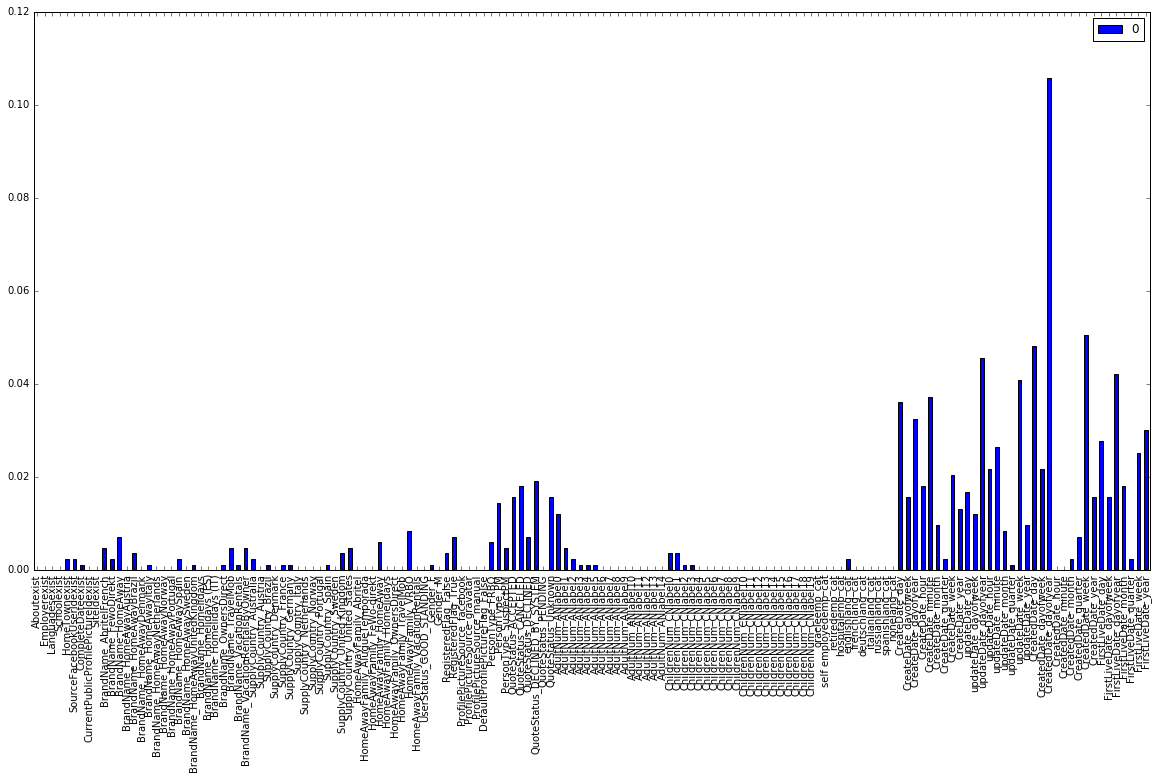

In [103]:
ax = ghj.plot(figsize=(20,10), kind='bar', xticks=ghj)
ax.set_xticklabels(c)

In [104]:
fig = ax.get_figure()
fig.subplots_adjust(bottom=0.3)
fig.savefig('feat_imp_xgb.pdf')

In [128]:
GB = GradientBoostingClassifier(n_estimators=100, random_state=0)

In [130]:
param_dist3 = {"max_depth":sp_randint(1,11), "n_estimators":sp_randint(25,100)}

# run randomized search
n_iter_search = 2
random_search3 = RandomizedSearchCV(GB, param_distributions=param_dist3,n_iter=n_iter_search)
random_search3.fit(df_final_x, df_final_y)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params={}, iid=True, n_iter=2, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1267b3c50>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1267b3990>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=0)

In [131]:
random_search3.grid_scores_

[mean: 0.98169, std: 0.00185, params: {'n_estimators': 38, 'max_depth': 8},
 mean: 0.98228, std: 0.00189, params: {'n_estimators': 96, 'max_depth': 4}]

In [107]:
GB.fit(df_final_x,df_final_y)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [108]:
ghj = pd.DataFrame(GB.feature_importances_)

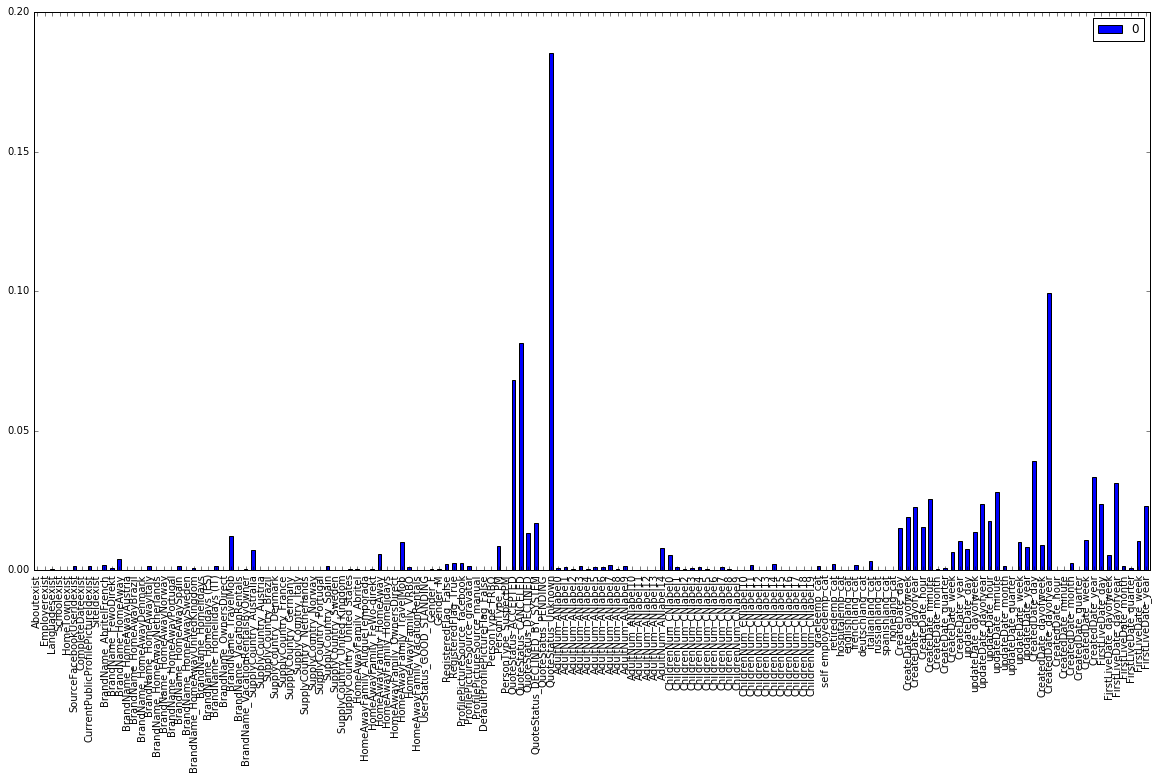

In [109]:
ax = ghj.plot(figsize=(20,10), kind='bar', xticks=ghj)
ax.set_xticklabels(c)

In [110]:
fig = ax.get_figure()
fig.subplots_adjust(bottom=0.3)
fig.savefig('feat_imp_GB.pdf')

In [111]:
RF_forest = RandomForestClassifier(n_estimators=500, random_state=0)
E_Trees = ExtraTreesClassifier(n_estimators=500, random_state=0)

In [112]:
RF_forest.fit(df_final_x, df_final_y)
importances = RF_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
fsad = pd.DataFrame()
for f in range(df_final_x.shape[1]):
    fsadq = pd.DataFrame({'Name':[c[indices[f]]],'Importance':[importances[indices[f]]]})
    fsad = pd.concat([fsad,fsadq], axis=0)
#Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(df_final_x.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(df_final_x.shape[1]), indices)
# plt.xlim([-1, df_final_x.shape[1]])
# plt.show()

In [113]:
fsad.to_csv('feat_imp_RF.csv', index=None)

In [114]:
E_Trees.fit(df_final_x, df_final_y)
importances = E_Trees.feature_importances_
std = np.std([tree.feature_importances_ for tree in E_Trees.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
fsad = pd.DataFrame()
for f in range(df_final_x.shape[1]):
    fsadq = pd.DataFrame({'Name':[c[indices[f]]],'Importance':[importances[indices[f]]]})
    fsad = pd.concat([fsad,fsadq], axis=0)
#Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(df_final_x.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(df_final_x.shape[1]), indices)
# plt.xlim([-1, df_final_x.shape[1]])
# plt.show()

In [115]:
fsad.to_csv('feat_imp_E.csv', index=None)

In [116]:
alg_list = [E_Trees,RF_forest,GB,xgg]

In [117]:
for i in alg_list:
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
    scores = cross_validation.cross_val_score(i, df_final_x, df_final_y, cv=3)
# Take the mean of the scores (because we have one for each fold)
    print(scores.mean())

0.981390020296
0.981580023096
0.981140026496
0.981170025896


In [118]:
fscores = xgg.booster().get_fscore()

In [119]:
# importances = np.zeros(158)
# for k, v in fscores.iteritems():
#     importances[int(k[1:])] = v

In [120]:
import xgboost as xgb
import re

In [121]:
def create_feature_map(features, filename):
    outfile = open(filename, 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()   

In [122]:
# feats=list(df_final_x.columns.values)[1:-1]

In [123]:
# df_final_x.rename(columns=lambda x: x.strip(' \t\n\r'), inplace=True)

In [124]:
# df_final_x.columns = df_final_x.columns.str.strip(' \t\n\r')

In [125]:
create_feature_map(xgg.booster().feature_names,'xgb.fmap')

In [126]:
feats = xgg.booster().feature_names

In [127]:
cleaned = [ re.sub(r'\W+', '', x) for x in feats ]

In [128]:
create_feature_map(cleaned,'xgb.fmap')

In [129]:
xg_train = xgb.DMatrix( df_final_x, label=df_final_y)

In [130]:
param = {'max_depth':6, 'learning_rate':0.3, 'n_estimators':25, 'subsample':0.5, 'colsample_bytree':0.5, 'seed':0}

In [131]:
bst = xgb.train(param, xg_train)

In [132]:
def order_features_by_gains(bst, feature_map_file):
    str_dump = bst.get_dump(feature_map_file,with_stats=True)
    
    tree_arr = []
    for i_tree, tree in enumerate(str_dump):
        arr_lvls=tree.split('\n\t')
        a_tree = {}
        for lvl in arr_lvls:
            a_lvl ={}
            dum1 = lvl.split(',')
            if('leaf' in lvl):
                dum1[0].replace('\t','')
                dum10 = dum1[0].split(':')
                lvl_id = int(dum10[0])
                dum11 = dum10[1].split('leaf=')
                leaf = float(dum11[1])
                
                cover = float(dum1[1].replace('\n','').split('cover=')[1])
                a_lvl['lvl_id']=lvl_id
                a_lvl['leaf']=leaf
                a_lvl['cover']=cover
            else:
                dum10 = dum1[0].replace('\t','').replace('\n','')
                dum11 = dum10.split(':')
                lvl_id = int(dum11[0])
                dum12 = dum11[1].split('yes=')
                dum13 = dum12[0].replace('[','').replace(']','').split('<')
                feat_name = dum13[0]
                
                yes_to = int(dum12[1])
                no_to = int(dum1[1].split('no=')[1])
                missing = int(dum1[2].split('missing=')[1])
                gain = float(dum1[3].split('gain=')[1])
                cover = float(dum1[4].split('cover=')[1])            
                feat_thr = float(dum12[1])
                
                a_lvl['lvl_id']=lvl_id
                a_lvl['feat_name']=feat_name
                a_lvl['feat_thr'] = feat_thr
                a_lvl['yes_to'] = yes_to
                a_lvl['no_to']=no_to
                a_lvl['missing'] = missing
                a_lvl['gain']=gain
                a_lvl['cover']=cover
                
            a_tree[str(lvl_id)] = a_lvl
        tree_arr.append(a_tree)    
    feat_vocabulary = {}
    for tree in tree_arr:
        for lvl in tree:
            if('gain' in tree[lvl]):
                feat_data = feat_vocabulary.setdefault(tree[lvl]['feat_name'],{'gain':tree[lvl]['gain'],'cover':tree[lvl]['cover']})
                if(cmp(feat_data,{'gain':tree[lvl]['gain'],'cover':tree[lvl]['cover']})<>0):
                    try:
                        feat_vocabulary[tree[lvl]['feat_name']]['gain'] += tree[lvl]['gain']                    
                        feat_vocabulary[tree[lvl]['feat_name']]['cover'] += tree[lvl]['cover']
                    except:
                        feat_vocabulary[tree[lvl]['feat_name']]['gain'] = tree[lvl]['gain']                    
                        feat_vocabulary[tree[lvl]['feat_name']]['cover'] = tree[lvl]['cover']          
    
    sorted_feats = sorted(feat_vocabulary.items(),key=lambda k:k[1]['gain'], reverse=True)
    return sorted_feats

In [133]:
sorted_feats = order_features_by_gains(bst,'xgb.fmap')

In [169]:
inf_gain = pd.concat([pd.DataFrame.from_dict(pd.DataFrame(sorted_feats)[1].to_dict()).T,pd.DataFrame(sorted_feats)[0]], axis=1)

In [170]:
inf_gain.rename(columns={0:'features'},inplace=True)

In [172]:
inf_gain.to_csv('inf_gain.csv', index=False)